# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dimas Firmansyah
- **Email:** foreirn@gmail.com
- **ID Dicoding:** dfirmansyah

## Menentukan Pertanyaan Bisnis

- Bagaimana angka Air Quality Index (AQI) tiap wilayah?
- Apa wilayah yang paling buruk kualitas udaranya?

## Import Semua Packages/Library yang Digunakan

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Data Wrangling

### Gathering Data

In [262]:
data_dir = "./data/PRSA_Data_20130301-20170228"

dfs: list[pd.DataFrame] = []
for file in os.listdir(data_dir):
    if not file.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(data_dir, file))
    df.drop(columns=["No"], inplace=True)
    dfs.append(df)

df = pd.concat(dfs).reset_index(drop=True)
df.sample(n=10, random_state=69)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
47412,2014,7,28,12,131.0,142.0,7.0,27.0,1300.0,225.0,34.5,996.0,20.1,0.0,SW,1.5,Gucheng
237384,2016,3,30,0,5.0,19.0,2.0,17.0,300.0,80.0,14.5,1008.2,-10.3,0.0,N,2.0,Changping
243635,2016,12,15,11,11.0,69.0,7.0,19.0,400.0,40.0,2.0,1025.7,-14.2,0.0,WNW,7.5,Changping
223881,2014,9,14,9,13.0,13.0,2.0,11.0,300.0,54.0,22.3,1009.9,1.3,0.0,NNW,2.9,Changping
258053,2014,8,8,5,52.0,148.0,11.0,64.0,700.0,29.0,21.8,1004.0,19.7,0.0,NNE,1.1,Wanliu
103972,2017,1,9,4,7.0,11.0,2.0,12.0,300.0,42.0,-3.5,1018.6,-12.0,0.0,NNW,1.2,Huairou
373487,2015,10,8,23,7.0,70.0,7.0,21.0,300.0,29.0,9.6,1006.1,-0.3,0.0,ESE,1.1,Dingling
369872,2015,5,11,8,12.0,20.0,2.0,16.0,400.0,37.0,14.1,1000.7,0.0,0.0,W,3.2,Dingling
406260,2015,7,5,12,65.0,65.0,19.0,31.0,1400.0,142.0,26.6,1006.0,12.6,0.0,N,1.2,Guanyuan
282047,2013,5,3,23,95.0,135.0,22.0,51.0,1200.0,118.0,17.3,1013.2,5.6,0.0,SW,2.3,Dongsi


#### Insight
- xxx
- xxx

### Assessing Data

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [264]:
print("Duplikasi: ", df.duplicated().sum())
df.isna().sum()

Duplikasi:  0


year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [265]:
df.head(n=20)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
5,2013,3,1,5,10.0,10.0,12.0,15.0,400.0,70.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Tiantan
6,2013,3,1,6,8.0,19.0,12.0,14.0,400.0,72.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Tiantan
7,2013,3,1,7,7.0,7.0,12.0,19.0,400.0,67.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Tiantan
8,2013,3,1,8,3.0,6.0,14.0,29.0,500.0,56.0,-0.3,1030.4,-21.2,0.0,NW,4.6,Tiantan
9,2013,3,1,9,8.0,2.0,11.0,22.0,500.0,65.0,0.4,1030.5,-23.3,0.0,N,5.5,Tiantan


In [266]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [267]:
q1 = df["PM2.5"].quantile(0.25)
q3 = df["PM2.5"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q1 + 1.5 * iqr

outliers = df[(df["PM2.5"] < lower_bound) | (df["PM2.5"] > upper_bound)]
outliers

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
109,2013,3,5,13,161.0,180.0,88.0,156.0,3200.0,99.0,13.0,1010.1,-8.3,0.0,ENE,1.5,Tiantan
110,2013,3,5,14,182.0,184.0,92.0,168.0,3200.0,99.0,13.3,1009.5,-8.0,0.0,ENE,1.6,Tiantan
111,2013,3,5,15,198.0,200.0,108.0,135.0,2299.0,99.0,13.8,1009.1,-7.6,0.0,E,1.9,Tiantan
112,2013,3,5,16,168.0,198.0,109.0,94.0,1800.0,99.0,13.2,1009.0,-7.5,0.0,ENE,1.8,Tiantan
115,2013,3,5,19,162.0,179.0,90.0,155.0,2799.0,94.0,6.7,1010.4,-5.0,0.0,ESE,0.1,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420538,2017,2,19,10,161.0,197.0,53.0,86.0,1000.0,14.0,5.1,1003.6,-7.4,0.0,NE,1.2,Guanyuan
420539,2017,2,19,11,169.0,187.0,54.0,80.0,2000.0,27.0,6.7,1003.1,-7.0,0.0,NE,2.9,Guanyuan
420540,2017,2,19,12,174.0,219.0,51.0,95.0,2200.0,70.0,8.6,1002.7,-6.8,0.0,NNE,2.3,Guanyuan
420541,2017,2,19,13,181.0,190.0,49.0,98.0,2000.0,34.0,10.2,1002.1,-6.6,0.0,NNE,1.5,Guanyuan


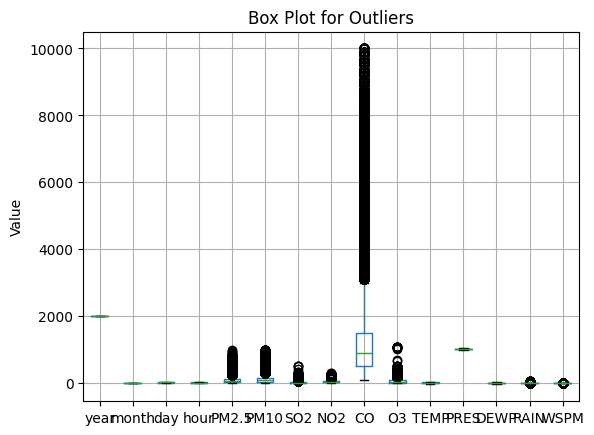

In [268]:
df.boxplot()
plt.title("Box Plot for Outliers")
plt.ylabel("Value")
plt.show()

In [269]:
df.groupby("station").count()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
station,,,,,,,,,,,,,,,,
Aotizhongxin,35064,35064,35064,35064,34139,34346,34129,34041,33288,33345,35044,35044,35044,35044,34983,35050
Changping,35064,35064,35064,35064,34290,34482,34436,34397,33543,34460,35011,35014,35011,35013,34924,35021
Dingling,35064,35064,35064,35064,34285,34408,34334,33830,33052,33850,35011,35014,35011,35013,34924,35021
Dongsi,35064,35064,35064,35064,34314,34511,34401,33463,31867,34400,35044,35044,35044,35044,34986,35050
Guanyuan,35064,35064,35064,35064,34448,34635,34590,34405,33311,33891,35044,35044,35044,35044,34983,35050
Gucheng,35064,35064,35064,35064,34418,34683,34557,34396,33663,34335,35013,35014,35013,35021,34905,35022
Huairou,35064,35064,35064,35064,34111,34287,34084,33425,33642,33913,35013,35011,35011,35009,34762,35015
Nongzhanguan,35064,35064,35064,35064,34436,34624,34618,34372,33858,34558,35044,35044,35044,35044,34986,35050
Shunyi,35064,35064,35064,35064,34151,34516,33768,33699,32886,33575,35013,35013,35010,35013,34581,35020


In [270]:
df[df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].isna().all(axis=1)].head(20)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1282,2013,4,23,10,NaN,NaN,NaN,NaN,NaN,NaN,12.6,1007.1,8.3,0.0,SSE,1.1,Tiantan
1283,2013,4,23,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1006.6,8.2,0.0,SE,1.5,Tiantan
4979,2013,9,24,11,NaN,NaN,NaN,NaN,NaN,NaN,18.9,1018.4,0.0,0.0,NE,1.5,Tiantan
4980,2013,9,24,12,NaN,NaN,NaN,NaN,NaN,NaN,19.4,1017.4,0.9,0.0,NNW,3.2,Tiantan
4981,2013,9,24,13,NaN,NaN,NaN,NaN,NaN,NaN,20.6,1016.5,-0.7,0.0,NW,3.3,Tiantan
7749,2014,1,17,21,NaN,NaN,NaN,NaN,NaN,NaN,-1.6,1028.1,-6.5,0.0,W,1.8,Tiantan
7750,2014,1,17,22,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,1028.2,-8.2,0.0,NNW,0.6,Tiantan
7751,2014,1,17,23,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,1028.2,-14.4,0.0,E,1.0,Tiantan
7752,2014,1,18,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,1028.3,-15.8,0.0,NW,1.1,Tiantan
7753,2014,1,18,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1028.7,-16.9,0.0,NW,1.9,Tiantan


#### Insight
- Data tidak memiliki duplikat
- Data berisi data yang diambil setiap jam
- Cukup banyak kolom yang kosong, namun karena data merupakan time-series, dapat menggunakan interpolasi untuk mengisi bagian `NaN`
- Nilai maksimal PM2.5 dan PM10 cukup mencurigakan

### Cleaning Data

#### Drop data yang tidak dibutuhkan

Kita hanya tertarik untuk perhitungan AQI

In [271]:
df.drop(columns=["DEWP", "RAIN", "wd", "WSPM"], inplace=True)
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,station
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,Tiantan


#### Mengubah kolom `year`, `month`, `day`, `hour` menjadi `datetime`

In [272]:
dt_cols = ["year", "month", "day", "hour"]

df.insert(0, "datetime", pd.to_datetime(df[dt_cols]))
df.drop(columns=dt_cols, inplace=True)
df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,station
0,2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,Tiantan
1,2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,Tiantan
2,2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,Tiantan
3,2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,Tiantan
4,2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,Tiantan


### Interpolasi untuk mengisi nilai `NaN`

In [273]:
pol_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES"]
grouped_df = df.groupby("station").apply(
    lambda x: x.interpolate(), include_groups=False
)

for col in pol_cols:
    df[col] = grouped_df[col].values

df.isna().sum()

datetime     0
PM2.5        0
PM10         0
SO2          0
NO2         22
CO           0
O3           0
TEMP         0
PRES         0
station      0
dtype: int64

In [274]:
df[df["NO2"].isna()]

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,station
70128,2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,Huairou
70129,2013-03-01 01:00:00,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,Huairou
175320,2013-03-01 00:00:00,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,Aotizhongxin
175321,2013-03-01 01:00:00,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,Aotizhongxin
175322,2013-03-01 02:00:00,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,Aotizhongxin
175323,2013-03-01 03:00:00,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,Aotizhongxin
175324,2013-03-01 04:00:00,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,Aotizhongxin
175325,2013-03-01 05:00:00,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,Aotizhongxin
175326,2013-03-01 06:00:00,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,Aotizhongxin
175327,2013-03-01 07:00:00,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,1025.6,Aotizhongxin


#### Insight
- Setelah cleaning, masih ada beberapa nilai `NaN`, namun tidak masalah karena perhitungan AQI hanya perlu salah satu nilai polutan

## Exploratory Data Analysis (EDA)

#### Menghitung Air Quality Index
Referensi: 
- https://document.airnow.gov/technical-assistance-document-for-the-reporting-of-daily-air-quailty.pdf
- https://www.apis.ac.uk/unit-conversion

#### Normalisasi satuan polutan
Mengubah satuan dari ug/m3 ke satuan yang digunakan dalam perhitungan

In [275]:
def to_ppb(col: str, weight: float):
    t = df["TEMP"] + 273
    p = df["PRES"]

    vol = 22.41 * (t / 273.0) * (1013.0 / p)
    return df[col] / (weight / vol)


df["O3"] = to_ppb("O3", 48) / 1000.0
df["CO"] = to_ppb("CO", 28.01) / 1000.0
df["SO2"] = to_ppb("SO2", 64.066)
df["NO2"] = to_ppb("NO2", 46.0055)

#### Menghitung rata-rata polutan
Setiap polutan dihitung menggunakan rata-rata pada rentang waktu tertentu.
- O3: 8 jam
- PM2.5: 24 jam
- PM10: 24 jam
- CO: 8 jam
- SO: 1 jam
- NO2: 1 jam

In [276]:
def roll_avg(col: str, window: int):
    df[col] = df.groupby("station")[col].rolling(window=window).mean().values


roll_avg("PM2.5", 24)
roll_avg("PM10", 24)
roll_avg("CO", 8)
roll_avg("O3", 8)

df.head(24)

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,station
0,2013-03-01 00:00:00,NaN,NaN,1.381952,3.367821,NaN,NaN,-0.7,1023.0,Tiantan
1,2013-03-01 01:00:00,NaN,NaN,1.379653,3.362216,NaN,NaN,-1.1,1023.2,Tiantan
2,2013-03-01 02:00:00,NaN,NaN,1.724060,4.801758,NaN,NaN,-1.1,1023.5,Tiantan
3,2013-03-01 03:00:00,NaN,NaN,3.785049,5.270956,NaN,NaN,-1.4,1024.5,Tiantan
4,2013-03-01 04:00:00,NaN,NaN,4.117210,5.733513,NaN,NaN,-2.0,1025.2,Tiantan
5,2013-03-01 05:00:00,NaN,NaN,6.168850,8.590571,NaN,NaN,-2.2,1025.6,Tiantan
6,2013-03-01 06:00:00,NaN,NaN,6.154337,15.236198,NaN,NaN,-2.6,1026.5,Tiantan
7,2013-03-01 07:00:00,NaN,NaN,6.514558,19.576409,0.567353,0.036176,-1.6,1027.4,Tiantan
8,2013-03-01 08:00:00,NaN,NaN,5.515475,20.641879,0.576843,0.035747,0.1,1028.3,Tiantan
9,2013-03-01 09:00:00,NaN,NaN,4.152460,13.492738,0.586806,0.035403,1.2,1028.5,Tiantan


### Truncate nilai

In [277]:
df = df.round(
    {
        "O3": 3,
        "PM2.5": 1,
        "PM10": 0,
        "CO": 1,
        "SO2": 0,
        "NO2": 0,
    }
)

df.head(24)

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,station
0,2013-03-01 00:00:00,NaN,NaN,1.0,3.0,NaN,NaN,-0.7,1023.0,Tiantan
1,2013-03-01 01:00:00,NaN,NaN,1.0,3.0,NaN,NaN,-1.1,1023.2,Tiantan
2,2013-03-01 02:00:00,NaN,NaN,2.0,5.0,NaN,NaN,-1.1,1023.5,Tiantan
3,2013-03-01 03:00:00,NaN,NaN,4.0,5.0,NaN,NaN,-1.4,1024.5,Tiantan
4,2013-03-01 04:00:00,NaN,NaN,4.0,6.0,NaN,NaN,-2.0,1025.2,Tiantan
5,2013-03-01 05:00:00,NaN,NaN,6.0,9.0,NaN,NaN,-2.2,1025.6,Tiantan
6,2013-03-01 06:00:00,NaN,NaN,6.0,15.0,NaN,NaN,-2.6,1026.5,Tiantan
7,2013-03-01 07:00:00,NaN,NaN,7.0,20.0,0.6,0.036,-1.6,1027.4,Tiantan
8,2013-03-01 08:00:00,NaN,NaN,6.0,21.0,0.6,0.036,0.1,1028.3,Tiantan
9,2013-03-01 09:00:00,NaN,NaN,4.0,13.0,0.6,0.035,1.2,1028.5,Tiantan


#### Menghitung AQI

In [278]:
bp_df = pd.DataFrame(
    {
        "category": [
            "Good",
            "Moderate",
            "Unhealty for Sensitive Groups",
            "Unhealty",
            "Very Unhealty",
            "Hazardous",
        ],
        "AQI_min": [0, 51, 101, 151, 201, 301],
        "AQI_max": [50, 100, 150, 200, 300, 500],
        "O3_min": [0, 0.055, 0.071, 0.086, 0.106, 0.201],
        "O3_max": [0.054, 0.070, 0.085, 0.105, 0.200, 999999],
        "PM2.5_min": [0, 9.1, 35.5, 55.5, 125.5, 225.5],
        "PM2.5_max": [9.0, 35.4, 55.4, 125.4, 225.4, 999999],
        "PM10_min": [0, 55, 155, 255, 355, 425],
        "PM10_max": [54, 154, 254, 354, 424, 999999],
        "CO_min": [0, 4.5, 9.5, 12.4, 15.5, 30.5],
        "CO_max": [4.4, 9.4, 12.4, 15.4, 30.4, 999999],
        "SO2_min": [0, 36, 76, 186, 305, 605],
        "SO2_max": [35, 75, 185, 304, 604, 999999],
        "NO2_min": [0, 54, 101, 361, 650, 1250],
        "NO2_max": [53, 100, 360, 649, 1259, 999999],
    }
)


def count_aqi(col: str, c: float):
    if pd.isna(c):
        return np.nan

    hi, lo = f"{col}_max", f"{col}_min"

    cond = (bp_df[lo] <= c) & (bp_df[hi] >= c)
    row = bp_df[cond].iloc[0]

    i_hi, i_lo = row["AQI_max"], row["AQI_min"]
    b_hi, b_lo = row[hi], row[lo]

    i = ((i_hi - i_lo) / (b_hi - b_lo)) * (c - b_lo) + i_lo
    return np.round(i)


# pol_cols = ["O3", "PM2.5", "PM10", "CO", "SO2", "NO2"]
# values = df[pol_cols].values

# aqis = []
# for val in values:
#     aqi = np.nanmax([count_aqi(pol_cols[i], c) for i, c in enumerate(val)])
#     aqis.append(aqi)

# df["AQI"] = aqis

# df.head(50)

In [279]:
df.describe()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
count,420768,420492.000000,420492.000000,420768.000000,420746.000000,420684.000000,420684.000000,420768.000000,420768.000000
mean,2015-03-01 11:30:00.000001024,79.885914,104.966596,5.781740,25.704475,1.026257,0.028916,13.531692,1010.753337
min,2013-03-01 00:00:00,3.000000,3.000000,0.000000,0.000000,0.100000,0.000000,-19.900000,982.400000
25%,2014-03-01 05:45:00,29.800000,50.000000,1.000000,12.000000,0.500000,0.008000,3.100000,1002.300000
50%,2015-03-01 11:30:00,61.200000,88.000000,3.000000,22.000000,0.800000,0.022000,14.500000,1010.400000
75%,2016-02-29 17:15:00,106.900000,138.000000,7.000000,36.000000,1.300000,0.040000,23.300000,1019.000000
max,2017-02-28 23:00:00,580.700000,639.000000,192.000000,149.000000,8.300000,0.564000,41.600000,1042.800000
std,NaN,69.463495,75.109005,7.743061,17.510356,0.868818,0.026866,11.437867,10.474302


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2